In [7]:
from fastai.vision import *
from fastai.callbacks import OneCycleScheduler
import fastai.utils as utils

utils.check_perf()

import torch
torch.cuda.is_available()

Running performance checks.

*** libjpeg-turbo status
✔ libjpeg-turbo is on

*** Pillow-SIMD status
✔ Running Pillow-SIMD 6.1.0.post1

*** CUDA status
✔ Running the latest CUDA 10.1 with NVIDIA driver 440.33.01

Refer to https://docs.fast.ai/performance.html to make sense out of these checks and suggestions.


True

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [3]:
model = simple_cnn((3, 16, 16, 2))

In [4]:
learn = Learner(data, model)

In [5]:
learn.metrics = [accuracy]
cb = OneCycleScheduler(learn, lr_max=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.119166,0.098522,0.963690,00:02
1,0.070427,0.057972,0.975957,00:00
2,0.038333,0.025486,0.991168,00:00
3,0.027931,0.023917,0.989205,00:00
4,0.034239,0.026263,0.991168,00:00
5,0.038884,0.025133,0.990677,00:00
6,0.032288,0.043797,0.986261,00:00
7,0.027164,0.019215,0.993621,00:00
8,0.045757,0.055543,0.979882,00:00
9,0.053375,0.055521,0.978901,00:00


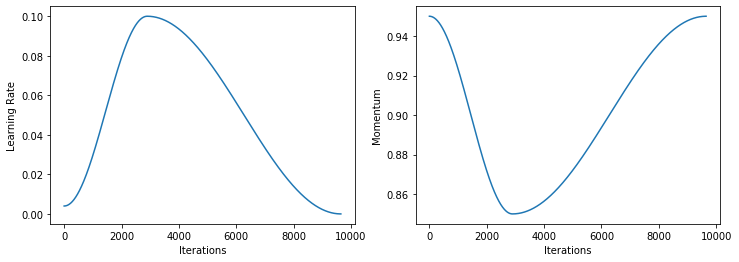

In [6]:
learn.fit(50, callbacks=cb)
learn.recorder.plot_lr(show_moms=True)